In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

#file path
temp_path = "data\\Annual_Surface_Temperature_Change.csv"

#read csv file into dataframe
temp_csv = pd.read_csv(temp_path)

In [2]:
temp_csv

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [3]:
world = temp_csv.iloc[221]

world

ObjectId                                                   222
Country                                                  World
ISO2                                                       NaN
ISO3                                                       WLD
Indicator    Temperature change with respect to a baseline ...
                                   ...                        
F2018                                                     1.29
F2019                                                    1.444
F2020                                                    1.711
F2021                                                    1.447
F2022                                                    1.394
Name: 221, Length: 72, dtype: object

In [4]:
columns = [f'F{i}' for i in range (1961, 2023)]
data = world[columns]

data_df = pd.DataFrame(data).reset_index()
data_df.columns = ['Year', 'Fahrenheit']

data_df['Year'] = data_df['Year'].str.replace('F', '').astype(int)
data_df['Fahrenheit'] =(data_df['Fahrenheit'] * 9/5) + 32

data_df

,Year,Fahrenheit
0,1961,32.3798
1,1962,32.0684
2,1963,32.3024
3,1964,31.5572
4,1965,31.5986
...,...,...
57,2018,34.322
58,2019,34.5992
59,2020,35.0798
60,2021,34.6046


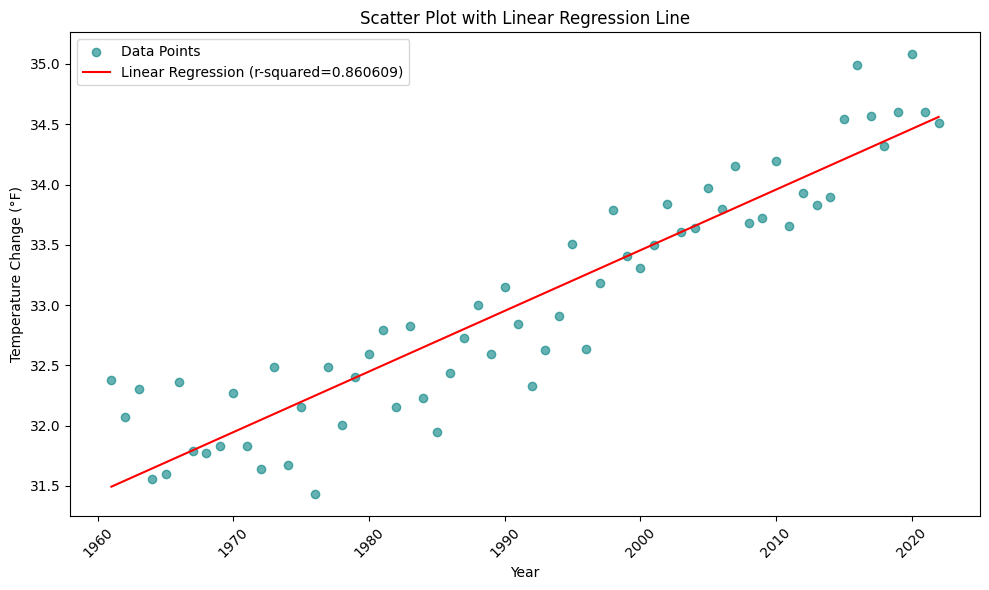

In [11]:
data_df['Fahrenheit'] = data_df['Fahrenheit'].apply(lambda x: round(x, 4))

x_values = data_df['Year'].values
y_values = data_df['Fahrenheit'].values

x_values = np.asarray(x_values)
y_values = np.asarray(y_values)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
line = [slope * x + intercept for x in x_values]


plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='teal', alpha=0.6, label='Data Points')
plt.plot(x_values, line, color='red', label=f'Linear Regression (r-squared={r_value**2:2f})')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°F)')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("temp_world_scat.png")
plt.show()



In [6]:
data_df['Year'] = data_df['Year'].astype(int)
#tenyears = [(1961, 1970), (1971, 1980), (1981, 1990), (1991, 2000), (2001, 2009), (2010, 2019), (2020, 2022)]
start_year = 1961
step_size = 10

interval_labels = []
interval_averages = []

while start_year <= 2022:
    end_year = start_year +step_size - 1
    mask = (data_df['Year'] >= start_year) & (data_df['Year'] <= end_year)
    interval_data = data_df[mask]
    interval_label = f'{start_year}-{end_year}'
    interval_average = interval_data['Fahrenheit'].mean()
    interval_labels.append(interval_label)
    interval_averages.append(interval_average)
    start_year += step_size
    
interval_df = pd.DataFrame({'10-Years': interval_labels, 'Fahrenheit': interval_average})

interval_df

,10-Years,Fahrenheit
0,1961-1970,34.5569
1,1971-1980,34.5569
2,1981-1990,34.5569
3,1991-2000,34.5569
4,2001-2010,34.5569
5,2011-2020,34.5569
6,2021-2030,34.5569


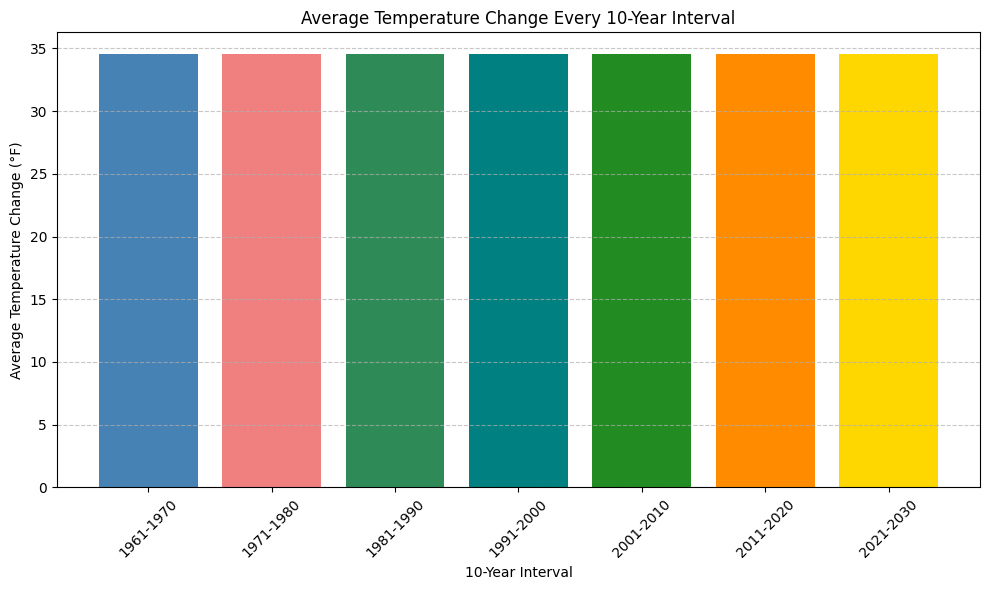

In [10]:

colors = ['steelblue', 'lightcoral', 'seagreen', 'teal', 'forestgreen', 'darkorange', '#FFD700']

plt.figure(figsize=(10, 6))
plt.bar(interval_df['10-Years'], interval_df['Fahrenheit'], color=colors)
plt.title('Average Temperature Change Every 10-Year Interval')
plt.xlabel('10-Year Interval')
plt.ylabel('Average Temperature Change (°F)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("temp_world_10yr.png")
plt.show()
